# Modelagem

# Pontos



In [ ]:
#Verificar quais colunas serão necessárias. 
#Organizar o dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
#!pip install pyarrow

In [2]:
pRaiz = os.path.abspath(r"..\\")  
pRaiz

'C:\\Users\\oedua\\Stack\\Projeto\\Projeto'

In [3]:
my_df = pd.read_parquet(pRaiz + '/2_Dados/Modelagem.parquet.gzip', engine='pyarrow')
my_df.head()

,diabetes,pressao_alta,colesterol_alto,testou_colesterol,IMC,fumante,AVC,ataque_cardiaco,ativ_fisica,consome_frutas,...,seguro_saude,n_foi_med_custo,auto_aval_saude,saude_mental,saude_fisica,dif_escadas,sexo,class_idade,class_educ,class_renda
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


In [ ]:
my_df.columns

Index(['diabetes', 'pressao_alta', 'colesterol_alto', 'testou_colesterol',
       'IMC', 'fumante', 'AVC', 'ataque_cardiaco', 'ativ_fisica',
       'consome_frutas', 'consome_vegetais', 'consumo_alcool', 'seguro_saude',
       'n_foi_med_custo', 'auto_aval_saude', 'saude_mental', 'saude_fisica',
       'dif_escadas', 'sexo', 'class_idade', 'class_educ', 'class_renda'],
      dtype='object')

In [ ]:
# # poucos se considerm  totalmente saudável sabendo que tem diabetes ne
# # muitos consideram a saúde no mínimo ok, então a base é desbalanceada
# pd.crosstab(index = my_df['diabetes'],columns = my_df['auto_aval_saude'], normalize = 'index')

In [ ]:
my_df = my_df[['pressao_alta', 'colesterol_alto',
       'IMC', 'fumante', 'ataque_cardiaco', 'ativ_fisica',
       'consome_frutas', 'consome_vegetais', 'consumo_alcool', 'auto_aval_saude', 'saude_fisica',
       'dif_escadas', 'sexo','diabetes']]

In [ ]:
my_df.head(5)

,pressao_alta,colesterol_alto,IMC,fumante,ataque_cardiaco,ativ_fisica,consome_frutas,consome_vegetais,consumo_alcool,auto_aval_saude,saude_fisica,dif_escadas,sexo,diabetes
0,1,1,40,1,0,0,0,1,0,5,15,1,0,0
1,0,0,25,1,0,1,0,0,0,3,0,0,0,0
2,1,1,28,0,0,0,1,0,0,5,30,1,0,0
3,1,0,27,0,0,1,1,1,0,2,0,0,0,0
4,1,1,24,0,0,1,1,1,0,2,0,0,0,0


In [ ]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype
---  ------            --------------   -----
 0   pressao_alta      253680 non-null  int64
 1   colesterol_alto   253680 non-null  int64
 2   IMC               253680 non-null  int64
 3   fumante           253680 non-null  int64
 4   ataque_cardiaco   253680 non-null  int64
 5   ativ_fisica       253680 non-null  int64
 6   consome_frutas    253680 non-null  int64
 7   consome_vegetais  253680 non-null  int64
 8   consumo_alcool    253680 non-null  int64
 9   auto_aval_saude   253680 non-null  int64
 10  saude_fisica      253680 non-null  int64
 11  dif_escadas       253680 non-null  int64
 12  sexo              253680 non-null  int64
 13  diabetes          253680 non-null  int64
dtypes: int64(14)
memory usage: 27.1 MB


#Separando os dados

In [ ]:
target_name = 'diabetes'
X = my_df.drop('diabetes', axis=1)
y = my_df[target_name]

In [ ]:
X

,pressao_alta,colesterol_alto,IMC,fumante,ataque_cardiaco,ativ_fisica,consome_frutas,consome_vegetais,consumo_alcool,auto_aval_saude,saude_fisica,dif_escadas,sexo
0,1,1,40,1,0,0,0,1,0,5,15,1,0
1,0,0,25,1,0,1,0,0,0,3,0,0,0
2,1,1,28,0,0,0,1,0,0,5,30,1,0
3,1,0,27,0,0,1,1,1,0,2,0,0,0
4,1,1,24,0,0,1,1,1,0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1,1,45,0,0,0,1,1,0,3,5,0,1
253676,1,1,18,0,0,0,0,0,0,4,0,1,0
253677,0,0,28,0,0,1,1,0,0,1,0,0,0
253678,1,0,23,0,0,0,1,1,0,3,0,0,1


In [ ]:
y

0         0
1         0
2         0
3         0
4         0
         ..
253675    0
253676    1
253677    0
253678    0
253679    1
Name: diabetes, Length: 253680, dtype: int64

#Transformando os dados.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X = scaler.fit_transform(X)
X

array([[1.        , 1.        , 0.3255814 , ..., 0.5       , 1.        ,
        0.        ],
       [0.        , 0.        , 0.15116279, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 1.        , 0.18604651, ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.18604651, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.12790698, ..., 0.        , 0.        ,
        1.        ],
       [1.        , 1.        , 0.15116279, ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
        X
       ,y
       ,test_size = 0.2
       ,random_state = 123
       ,stratify = y
)

#### **Treinando o algoritmo de arvore de decisão.**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train,y_train)

In [ ]:
importances = dtree.feature_importances_
feat_names = my_df.drop(['diabetes'],axis=1).columns

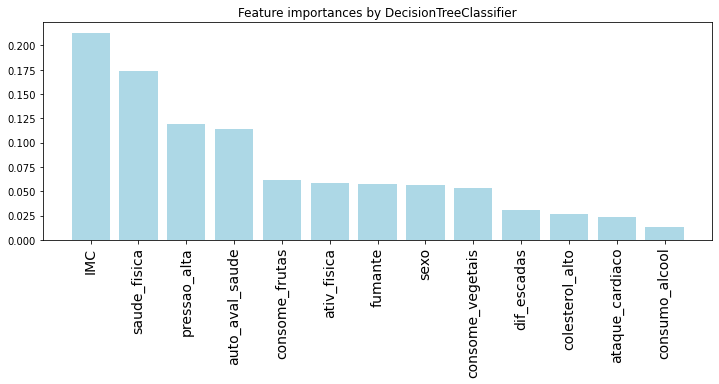

In [ ]:
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,4))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

In [ ]:
# X = my_df[["IMC","saude_fisica","pressao_alta","auto_aval_saude"]]
X = my_df[["IMC","saude_fisica","pressao_alta","auto_aval_saude","consome_frutas","ativ_fisica","fumante","consome_vegetais"]]

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
        X
       ,y
       ,test_size = 0.2
       ,random_state = 123
       ,stratify = y
)

In [ ]:
X_train

array([[0.09302326, 0.46666667, 0.        , ..., 1.        , 1.        ,
        0.        ],
       [0.27906977, 0.16666667, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.15116279, 0.13333333, 1.        , ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.19767442, 0.03333333, 1.        , ..., 1.        , 0.        ,
        1.        ],
       [0.1627907 , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.29069767, 0.        , 0.        , ..., 1.        , 0.        ,
        1.        ]])

In [ ]:
def base_rate_model(X) :
    y = np.zeros(X.shape[0])
    return y

###**Importando métodos de métrica de avaliação.**

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
def accuracy_result(y_test,y_predict):
    acc = accuracy_score(y_test, y_predict)
    print ("Accuracy = %2.2f" % acc)

In [ ]:
def roc_classification_report_results(model,y_test,y_predict):
    roc_ = roc_auc_score(y_test, y_predict)
    classfication_report = classification_report(y_test, y_predict)
    
    print ("\n{} AUC = {}\n".format(model, roc_))
    print(classfication_report)

###**Análise do modelo de baseline**

In [ ]:
y_predict = base_rate_model(X_test)

In [ ]:
accuracy_result(y_test, y_predict)

Accuracy = 0.84


In [ ]:
roc_classification_report_results("Base Model", y_test, y_predict)


Base Model AUC = 0.5

              precision    recall  f1-score   support

           0       0.84      1.00      0.91     42741
           1       0.00      0.00      0.00      7995

    accuracy                           0.84     50736
   macro avg       0.42      0.50      0.46     50736
weighted avg       0.71      0.84      0.77     50736



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### **Modelo de Regressão Logística.**

#### **Instânciando o algoritmo.**

In [ ]:
from sklearn.linear_model import LogisticRegression
logis = LogisticRegression()

#### **Realizando o treinamento.**

In [ ]:
logis.fit(X_train, y_train)

LogisticRegression()

#### **Calculando as predições.**

In [ ]:
y_predict = logis.predict(X_test)

###**Avaliando o resultado.**

In [ ]:
accuracy_result(y_test, y_predict)

Accuracy = 0.85


In [ ]:
roc_classification_report_results("Logistic Regression", y_test, y_predict)


Logistic Regression AUC = 0.5574793425016065

              precision    recall  f1-score   support

           0       0.86      0.98      0.91     42741
           1       0.54      0.14      0.22      7995

    accuracy                           0.85     50736
   macro avg       0.70      0.56      0.57     50736
weighted avg       0.81      0.85      0.80     50736



### **Modelo de Arvore de decisão.**

#### **Instânciando o algoritmo.**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

#### **Realizando o treinamento.**

In [ ]:
dtree = dtree.fit(X_train,y_train)

#### **Calculando as predições.**

In [ ]:
y_predict = dtree.predict(X_test)

#### **Avaliando o resultado.**

In [ ]:
accuracy_result(y_test, y_predict)

Accuracy = 0.83


In [ ]:
roc_classification_report_results("Decision Tree", y_test, y_predict)


Decision Tree AUC = 0.5574839340566657

              precision    recall  f1-score   support

           0       0.86      0.96      0.91     42741
           1       0.41      0.16      0.23      7995

    accuracy                           0.83     50736
   macro avg       0.64      0.56      0.57     50736
weighted avg       0.79      0.83      0.80     50736



### **Modelo de Arvore Aleatória (Random Forest)**

###**Instânciando o algoritmo.**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()

#### **Realizando o treinamento.**

In [ ]:
rf = rf.fit(X_train,y_train)

###**Calculando as predições.**

In [ ]:
y_predict = rf.predict(X_test)

#### **Avaliando o resultado.**

In [ ]:
accuracy_result(y_test, y_predict)

Accuracy = 0.83


In [ ]:
roc_classification_report_results("Random Forest", y_test, y_predict)


Random Forest AUC = 0.5667396618569908

              precision    recall  f1-score   support

           0       0.86      0.95      0.91     42741
           1       0.43      0.18      0.25      7995

    accuracy                           0.83     50736
   macro avg       0.64      0.57      0.58     50736
weighted avg       0.79      0.83      0.80     50736



### **Pycaret**

In [ ]:
!pip install pycaret

In [ ]:
# !pip install scikit-learn== 0.23.2

#### **Importando os métodos.**

In [ ]:
from pycaret.classification import *

#### **Definindo o Setup.**

In [ ]:
s = setup( my_df[["IMC","saude_fisica","pressao_alta","auto_aval_saude","consome_frutas","ativ_fisica","fumante","consome_vegetais","diabetes"]]
          ,target = "diabetes"
          ,numeric_features = ["pressao_alta"]
          ,normalize = True
          ,normalize_method = "minmax"
          ,data_split_stratify = True
          ,fix_imbalance = True,
         )

#### **Comparando diferentes modelos.**

In [ ]:
best = compare_models(fold = 5,sort = 'AUC')

NameError: ignored